In [1]:
# http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html

# http://preview.d2l.ai/d2l-en/master/chapter_computer-vision/semantic-segmentation-and-dataset.html#the-pascal-voc2012-semantic-segmentation-dataset

environment

In [2]:
using Pkg
envpath = expanduser("~/juliaenvs/dev/")
Pkg.activate(envpath)

  Activating project at `~/juliaenvs/dev`


libraries

In [3]:
# private libraries
using PascalVocTools; pv = PascalVocTools

PascalVocTools

In [4]:
# julia libraries
using Images
using FLoops

load dataset: focus on Class Segmentation

In [5]:
# paths
datasetPath = expanduser("~/datasets/pascalvoc/VOCdevkit/VOC2012/")

imagesPath  = datasetPath * "JPEGImages/"
classesPath = datasetPath * "SegmentationClass/"
objectsPath = datasetPath * "SegmentationObject/"

"/home/ciro/datasets/pascalvoc/VOCdevkit/VOC2012/SegmentationObject/"

In [6]:
# segmentation dataset
# trainFilesTxt = datasetPath * "ImageSets/Segmentation/train.txt"
# validFilesTxt = datasetPath * "ImageSets/Segmentation/val.txt"
trvalFilesTxt = datasetPath * "ImageSets/Segmentation/trainval.txt"


trvalImagesFpfn  = ( imagesPath  .* readlines(trvalFilesTxt) .* ".jpg" )
trvalClassesFpfn = ( classesPath .* readlines(trvalFilesTxt) .* ".png" )
trvalObjectsFpfn = ( objectsPath .* readlines(trvalFilesTxt) .* ".png" );

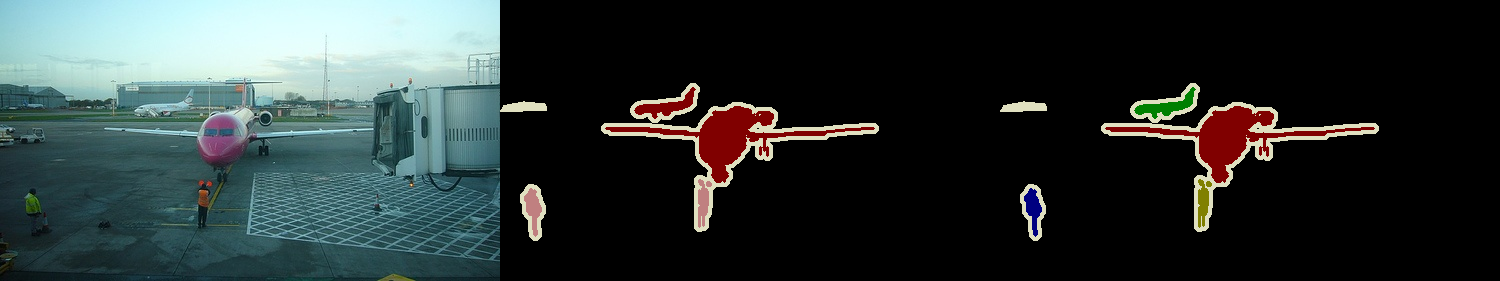

In [7]:
k = 1
im = Images.load(trvalImagesFpfn[k])
cl = Images.load(trvalClassesFpfn[k])
ob = Images.load(trvalObjectsFpfn[k])

mosaicview(im, cl, ob, nrow=1)

In [8]:
eltype(cl)

RGB{N0f8}

picture size: recommended padding (500,500), or better (512,512)

In [9]:
N = length(trvalImagesFpfn)
sizes = Array{Int, 2}(undef, (N,2))

@floop for k in 1:N
    im = Images.load(trvalImagesFpfn[k])
    sizes[k,1], sizes[k,2] = size(im)
end

minimum(sizes[:,1]), maximum(sizes[:,1])

(112, 500)

In [10]:
minimum(sizes[:,2]), maximum(sizes[:,2])

(174, 500)

PascalVOC functions

In [11]:
pv.voc_classnumbers   # 10 => "cow"

OrderedCollections.OrderedDict{Int64, String} with 21 entries:
  0  => "background"
  1  => "aeroplane"
  2  => "bicycle"
  3  => "bird"
  4  => "boat"
  5  => "bottle"
  6  => "bus"
  7  => "car"
  8  => "cat"
  9  => "chair"
  10 => "cow"
  11 => "diningtable"
  12 => "dog"
  13 => "horse"
  14 => "motorbike"
  15 => "person"
  16 => "potted plant"
  17 => "sheep"
  18 => "sofa"
  ⋮  => ⋮

In [12]:
pv.voc_classnames   # "cow" => 10

OrderedCollections.OrderedDict{String, Int64} with 21 entries:
  "background"   => 0
  "aeroplane"    => 1
  "bicycle"      => 2
  "bird"         => 3
  "boat"         => 4
  "bottle"       => 5
  "bus"          => 6
  "car"          => 7
  "cat"          => 8
  "chair"        => 9
  "cow"          => 10
  "diningtable"  => 11
  "dog"          => 12
  "horse"        => 13
  "motorbike"    => 14
  "person"       => 15
  "potted plant" => 16
  "sheep"        => 17
  "sofa"         => 18
  ⋮              => ⋮

In [13]:
pv.voc_colormap   # [64, 128, 0]    => 10

OrderedCollections.OrderedDict{Vector{Int64}, Int64} with 21 entries:
  [0, 0, 0]       => 0
  [128, 0, 0]     => 1
  [0, 128, 0]     => 2
  [128, 128, 0]   => 3
  [0, 0, 128]     => 4
  [128, 0, 128]   => 5
  [0, 128, 128]   => 6
  [128, 128, 128] => 7
  [64, 0, 0]      => 8
  [192, 0, 0]     => 9
  [64, 128, 0]    => 10
  [192, 128, 0]   => 11
  [64, 0, 128]    => 12
  [192, 0, 128]   => 13
  [64, 128, 128]  => 14
  [192, 128, 128] => 15
  [0, 64, 0]      => 16
  [128, 64, 0]    => 17
  [0, 192, 0]     => 18
  ⋮               => ⋮

In [14]:
pv.voc_classnames["cow"], pv.voc_colormap[[64,128,0]]

(10, 10)

In [15]:
# Return the value stored for the given key, or the given default value if no mapping for the key is present.
# get(collection, key, default)
get(pv.voc_colormap, [224,224,192], 0)   # edges

0

mask conversion

In [16]:
typeof(cl)

IndirectArrays.IndirectArray{RGB{N0f8}, 2, UInt8, Matrix{UInt8}, OffsetArrays.OffsetVector{RGB{N0f8}, Vector{RGB{N0f8}}}}

In [17]:
cl_out = pv.voc_rgb2class(cl)
unique(cl_out)

3-element Vector{Int64}:
  0
 15
  1

In [18]:
[pv.voc_classnumbers[k] for k in unique(cl_out)]

3-element Vector{String}:
 "background"
 "person"
 "aeroplane"